In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\jup_lab\movies_2004_2023_cleaned.csv')

# Start analysis

### Low budget

In [3]:
genres = ['action','adventure','animated','biographical','black','buddy','comedy',
 'comedy-drama','crime','drama','epic','fantasy','fiction','historical','horror','musical',
 'psychological','romantic','science','sports','superhero','supernatural','thriller','war']

In [4]:
budget_group = df['Budget group']

<Axes: >

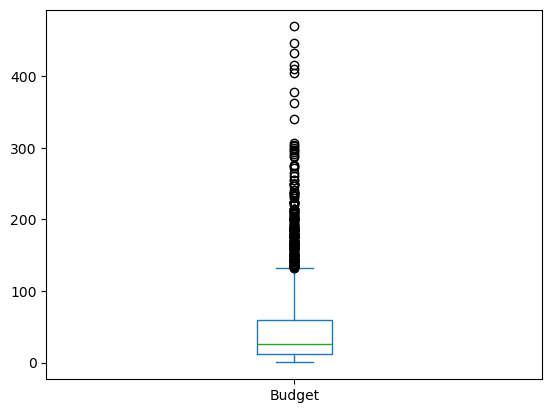

In [5]:
df['Budget'].plot.box()

I'll delete the movies with a too high profit perc. Their success is amazing and hard to replicate.

In [6]:
def get_limits(df):
    print('llimit', str(df.quantile(0.25) - 1.5*(df.quantile(0.75) - df.quantile(0.25))))
    print('ulimit', str(df.quantile(0.75) + 1.5*(df.quantile(0.75) - df.quantile(0.25))))
    print('Extreme llimit', str(df.quantile(0.25) - 3*(df.quantile(0.75) - df.quantile(0.25))))
    print('Extreme ulimit', str(df.quantile(0.75) + 3*(df.quantile(0.75) - df.quantile(0.25))))

#### Handling the outliers of Profit perc in low df

In [7]:
get_limits(df.loc[budget_group == 'low', 'Profit perc'])

llimit -639.947915
ulimit 937.468749
Extreme llimit -1231.479164
Extreme ulimit 1528.999998


In [8]:
(df.loc[budget_group == 'low', 'Profit perc'] > 938).sum()

103

In [9]:
low_df = df.loc[(budget_group == 'low') & (df['Profit perc'] < 938)]
low_df.shape

(1104, 33)

In [10]:
def profit_genre(df, genres, col):
    for i in genres:
        if df[i] == 1:
            df[i] = df[col]
    return df

#### I grab the genres that have at least 15 occurrences

In [11]:
low_df[genres].sum(axis=0)

action            72.0
adventure         17.0
animated          12.0
biographical      62.0
black             41.0
buddy             13.0
comedy           256.0
comedy-drama     148.0
crime             63.0
drama            320.0
epic               9.0
fantasy           21.0
fiction           41.0
historical        15.0
horror           139.0
musical           19.0
psychological     53.0
romantic         134.0
science           43.0
sports            24.0
superhero          7.0
supernatural      52.0
thriller         132.0
war               18.0
dtype: float64

In [12]:
low_genres = low_df[genres].sum(axis=0).loc[low_df[genres].sum(axis=0) > 15].index.tolist()
print(low_genres)

['action', 'adventure', 'biographical', 'black', 'comedy', 'comedy-drama', 'crime', 'drama', 'fantasy', 'fiction', 'horror', 'musical', 'psychological', 'romantic', 'science', 'sports', 'supernatural', 'thriller', 'war']


In [13]:
low_df_profit = low_df[low_genres+ ['Profit']].apply(profit_genre, genres=low_genres,
                                     col='Profit', axis=1)

low_df_profit[low_df_profit == 0] = np.nan

low_df_profit.head()

,action,adventure,biographical,black,comedy,comedy-drama,crime,drama,fantasy,fiction,horror,musical,psychological,romantic,science,sports,supernatural,thriller,war,Profit
2,-3.402554,NaN,NaN,NaN,-3.402554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.402554
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.8,NaN,NaN,NaN,NaN,83.8,NaN,NaN,83.8,NaN,83.800000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.600000
8,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
12,NaN,NaN,NaN,NaN,18.300000,NaN,NaN,NaN,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.300000


<Axes: >

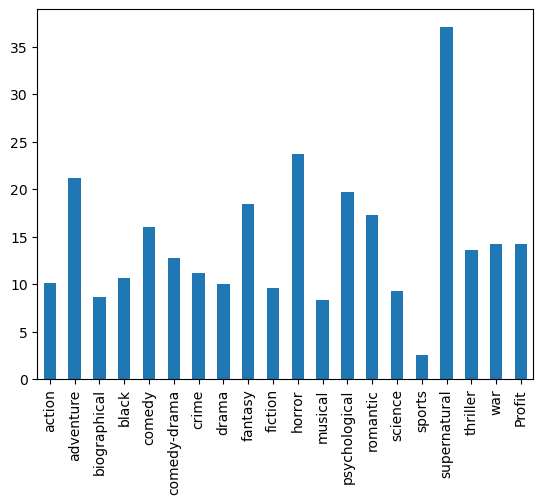

In [14]:
low_df_profit.mean(axis=0).plot.bar()

<Axes: >

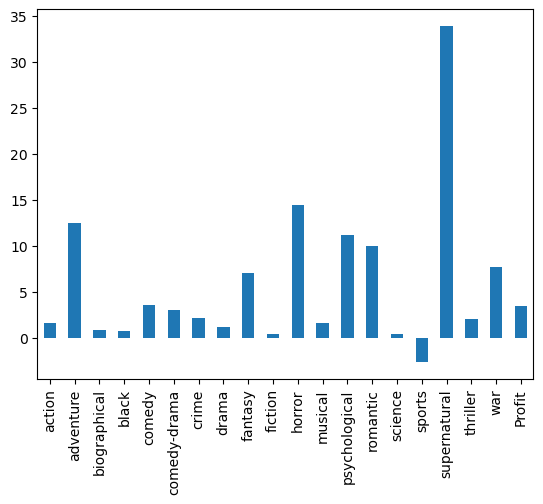

In [15]:
low_df_profit.quantile(q=0.5,axis=0).plot.bar()

In [16]:
low_df_profit_perc = low_df[low_genres+ ['Profit perc']].apply(profit_genre, genres=low_genres,
                                     col='Profit perc', axis=1)

low_df_profit_perc[low_df_profit_perc == 0] = np.nan

<Axes: >

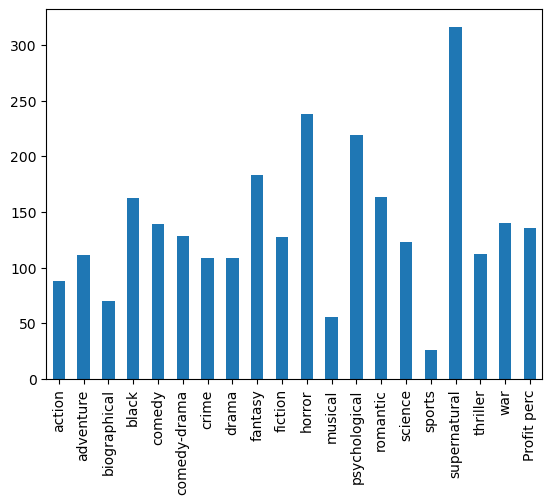

In [17]:
low_df_profit_perc.mean(axis=0).plot.bar()

<Axes: >

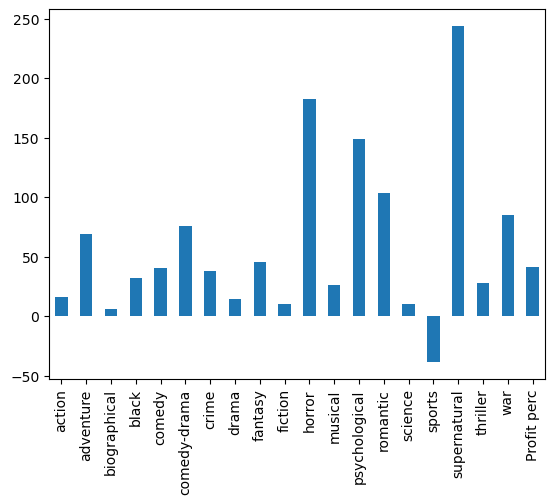

In [18]:
low_df_profit_perc.quantile(q=0.5, axis=0).plot.bar()

In [19]:
low_df[low_genres].corrwith(low_df['Profit perc']).sort_values(ascending=False)

supernatural     0.158637
horror           0.156434
psychological    0.076717
romantic         0.042822
fantasy          0.026966
black            0.021684
comedy           0.006584
war              0.002385
fiction         -0.006439
science         -0.010097
adventure       -0.012430
comedy-drama    -0.012492
crime           -0.026627
thriller        -0.034192
musical         -0.043230
action          -0.051326
biographical    -0.064857
sports          -0.066355
drama           -0.070248
dtype: float64

In [20]:
from scipy.stats import pearsonr

for i in low_genres:
    if pearsonr(low_df[i], low_df['Profit perc'])[1] < 0.05:
        print(i)
        print(pearsonr(low_df[i], low_df['Profit perc']))
        print()

biographical
PearsonRResult(statistic=-0.0648571090496266, pvalue=0.03117731783899872)

drama
PearsonRResult(statistic=-0.07024833010085962, pvalue=0.01957761539606652)

horror
PearsonRResult(statistic=0.1564342803087273, pvalue=1.7503377260725348e-07)

psychological
PearsonRResult(statistic=0.07671683345003175, pvalue=0.010775305780506157)

sports
PearsonRResult(statistic=-0.06635515229773745, pvalue=0.027476440984897984)

supernatural
PearsonRResult(statistic=0.15863667836813777, pvalue=1.167222990286402e-07)



In [28]:
low_df['drama'].sum()

320.0

In [47]:
from scipy.stats import bootstrap

data3 = (low_df_profit_perc['drama'].dropna(),)

bootstrap_ci = bootstrap(data3,
                         np.mean,
                         confidence_level=0.95,
                         random_state=1)

print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=84.13975860669707, high=135.10657965162608)


In [48]:
low_df_profit_perc['Profit perc'].mean()

135.7970213941871

In [45]:
data3 = (low_df_profit_perc['Profit perc'].dropna(),)

bootstrap_ci = bootstrap(data3,
                         np.mean,
                         confidence_level=0.95,
                         random_state=1)

print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=121.77024061029073, high=150.6323348066939)
